# Census Income Dataset

### Importing Packages

In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
raw_file = r'E:\\Programming languages\\Machine Learning\\Data Gathering & Processing\\04_Census_income\\adult.data'
dataset = pd.read_csv(raw_file)
df = pd.DataFrame(dataset)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Imformation about Attributes

In [4]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


### Assigning columns

In [5]:
column = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.columns = column
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


### Splitting into features and target

In [6]:
df_features = df.drop('income',axis=1)
df_target = df[['income']]
print(df_target.dtypes)
print(df_features.columns)
print(df_target.columns)

income    object
dtype: object
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Index(['income'], dtype='object')


### Checking for N-Unique Values

In [7]:
df_categorical_features = df_features.select_dtypes(include=['object']).columns
print(df_features[df_categorical_features].nunique()) # Only number of how many unique values are there

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64


### Checking for value counts

In [8]:
for cols in df_categorical_features:
    print(df_features[[cols]].value_counts()) # Giving unique value count for each categorical feature

workclass        
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64
education    
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64
marital-status        
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64
occupation        
 Prof-specialty       4140
 Craft-repair         409

### Performing Encoding 

In [9]:
ordinal_encoder = OrdinalEncoder() # Performing encoding
df_features_encoded = ordinal_encoder.fit_transform(df_features)
df_target_encoded = ordinal_encoder.fit_transform(df_target)
df_features_encoded = pd.DataFrame(df_features_encoded,columns=df_features.columns)
df_target_encoded = pd.DataFrame(df_target_encoded,columns=df_target.columns)
df_target_encoded.columns = ['income']

### Checking for outliers

<AxesSubplot: >

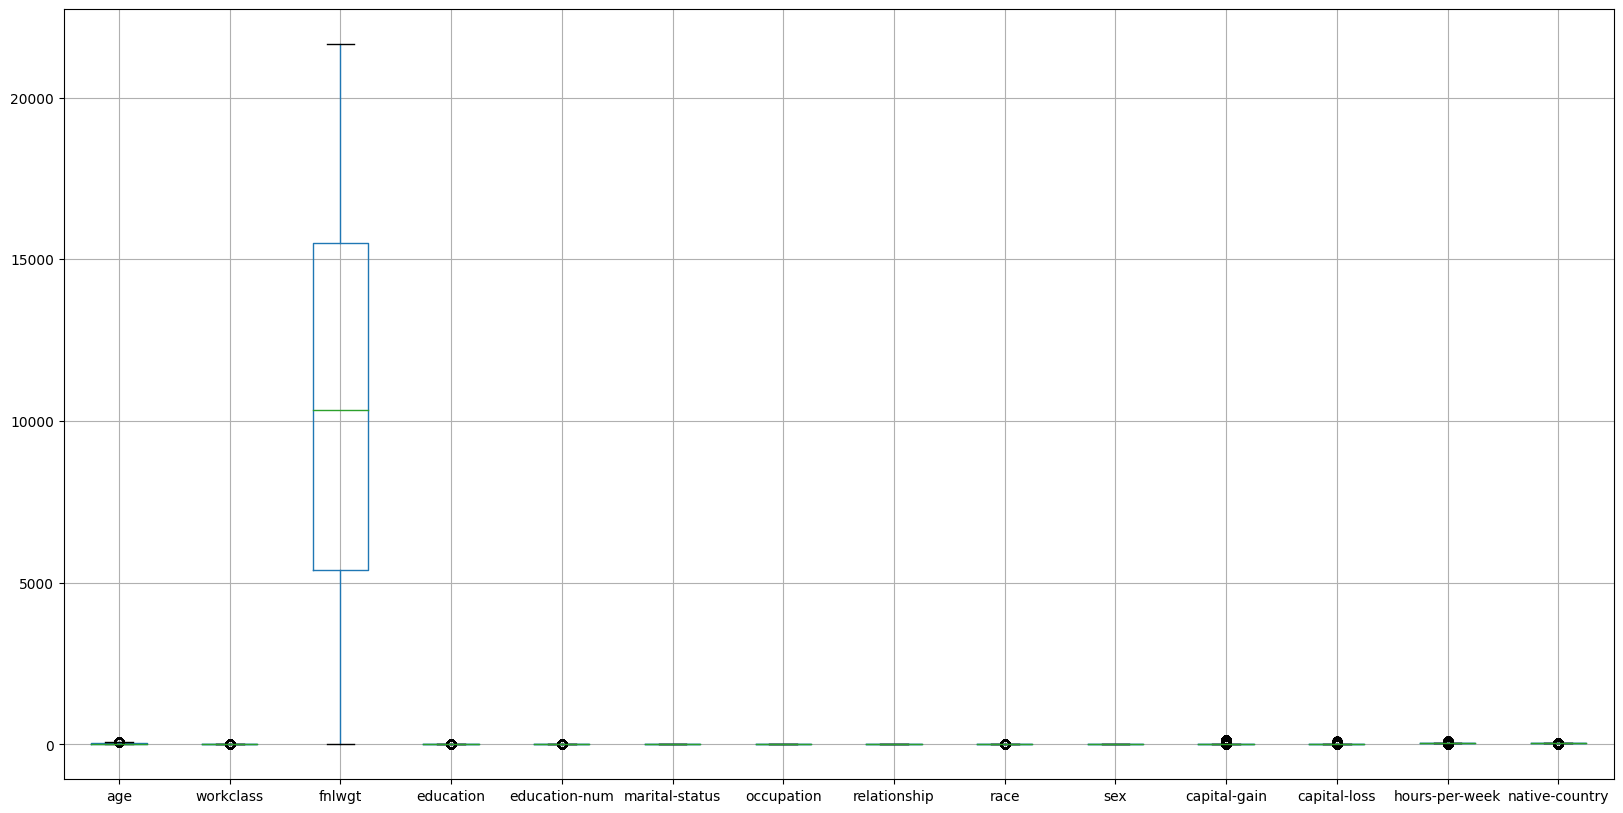

In [19]:
plt.figure(figsize=(20,10))
df_features_encoded.boxplot()

### Removing Outlliers

<AxesSubplot: >

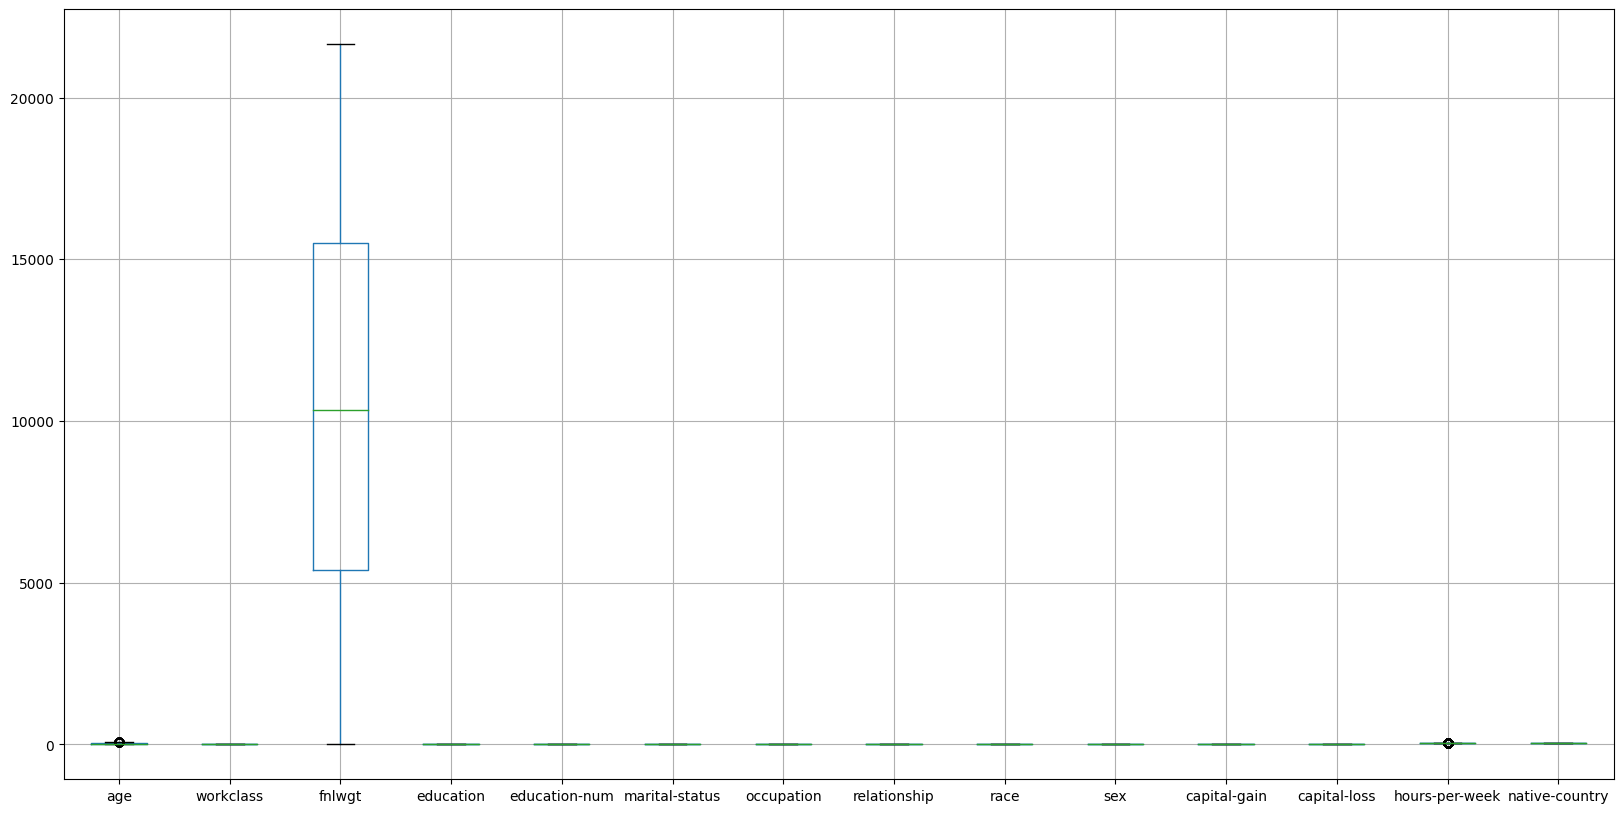

In [20]:
Q1 = df_features_encoded.quantile(0.25)
Q3 = df_features_encoded.quantile(0.75)
IQR = Q3 - Q1

# Formula to remove outliers
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5

df_features_no_outliers = df_features_encoded[(df_features_encoded >= lower_bound) & (df_features_encoded <= upper_bound)]
plt.figure(figsize=(20,10))
df_features_no_outliers.boxplot()

### Correaltion 

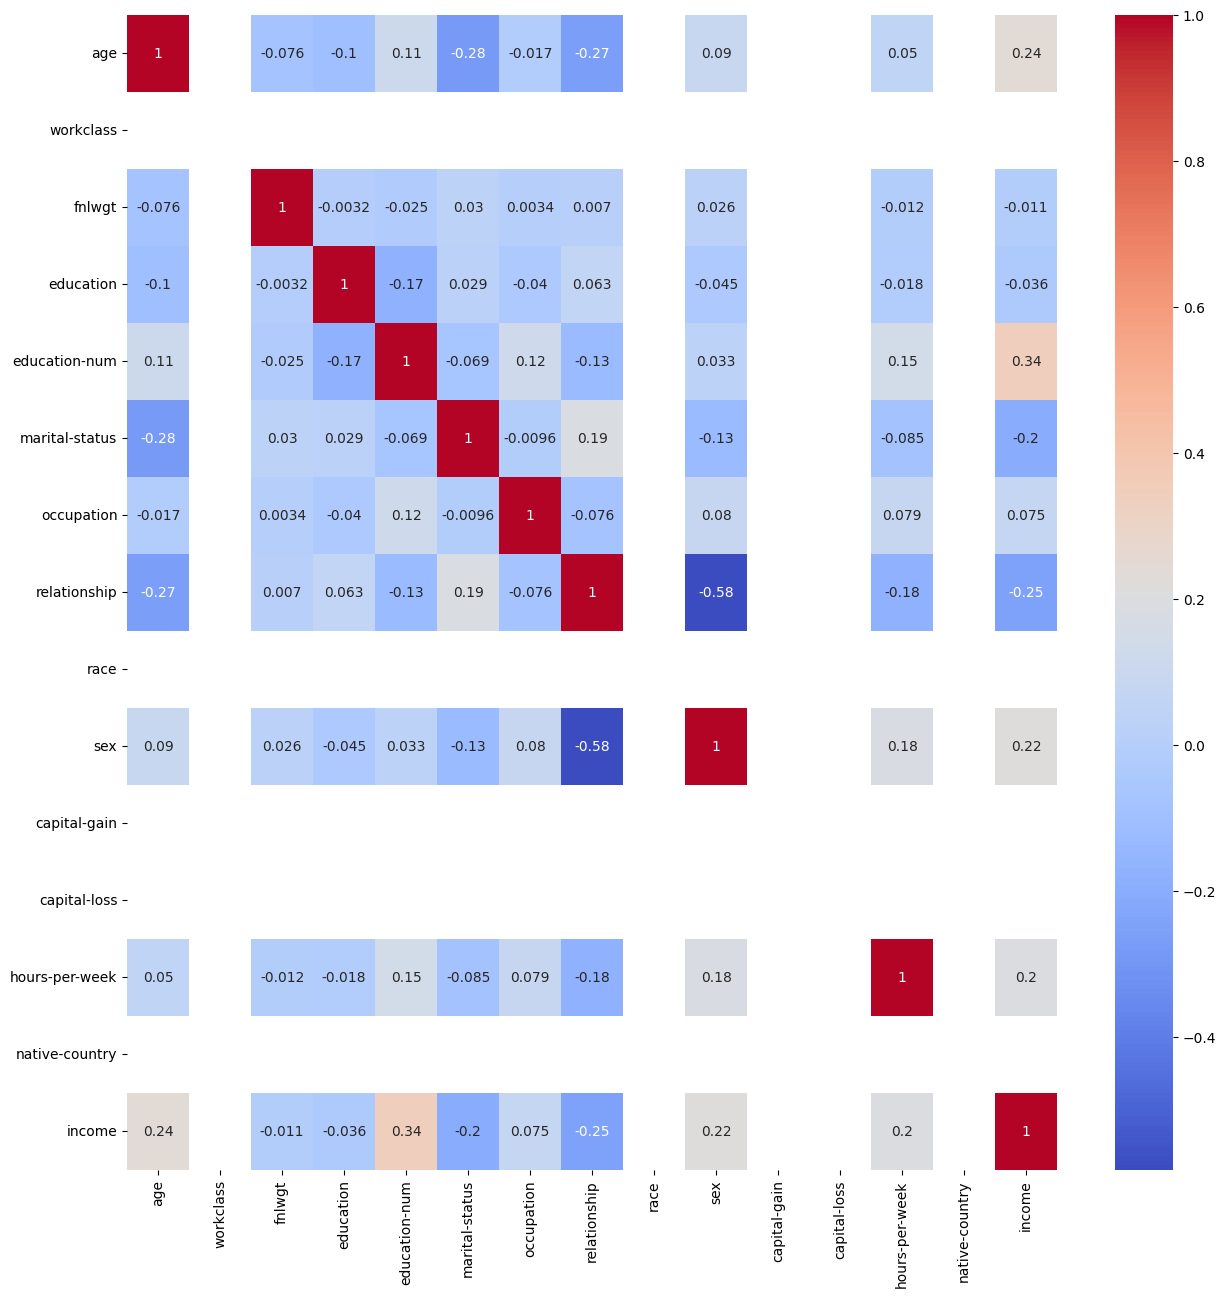

In [22]:
df_correaltion = pd.concat([df_features_no_outliers,df_target_encoded],axis=1).corr()
plt.figure(figsize=(15,15))
df_correaltion_plot = sns.heatmap(data=df_correaltion,annot=True,cmap='coolwarm')
plt.show()

### Normalization of Features

In [13]:
minMaxscaler = MinMaxScaler()
df_scaled_features = minMaxscaler.fit_transform(df_features_no_outliers)
df_scaled_features = pd.DataFrame(df_scaled_features)
df_scaled_features.columns = df_features.columns
print(df_scaled_features.head())

        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.540984        NaN  0.135129        0.4       0.727273        0.333333   
1  0.344262        0.0  0.650698        0.6       0.363636        0.000000   
2  0.590164        0.0  0.708445        NaN       0.181818        0.333333   
3  0.180328        0.0  0.894114        0.4       0.727273        0.333333   
4  0.327869        0.0  0.817657        0.7       0.818182        0.333333   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0    0.285714           0.0   0.0  1.0           0.0           0.0   
1    0.428571           0.2   0.0  1.0           0.0           0.0   
2    0.428571           0.0   NaN  1.0           0.0           0.0   
3    0.714286           1.0   NaN  0.0           0.0           0.0   
4    0.285714           1.0   0.0  0.0           0.0           0.0   

   hours-per-week  native-country  
0             NaN             0.0  
1        0.368421             0.0  
2 

### Finding Missing Values

In [23]:
imputer = SimpleImputer()
df_scaled_features = imputer.fit_transform(df_scaled_features)
df_scaled_features = pd.DataFrame(df_scaled_features)
df_scaled_features.columns = df_features.columns
print(df_scaled_features.head())

        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.540984        0.0  0.135129    0.40000       0.727273        0.333333   
1  0.344262        0.0  0.650698    0.60000       0.363636        0.000000   
2  0.590164        0.0  0.708445    0.62282       0.181818        0.333333   
3  0.180328        0.0  0.894114    0.40000       0.727273        0.333333   
4  0.327869        0.0  0.817657    0.70000       0.818182        0.333333   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0    0.285714           0.0   0.0  1.0           0.0           0.0   
1    0.428571           0.2   0.0  1.0           0.0           0.0   
2    0.428571           0.0   0.0  1.0           0.0           0.0   
3    0.714286           1.0   0.0  0.0           0.0           0.0   
4    0.285714           1.0   0.0  0.0           0.0           0.0   

   hours-per-week  native-country  
0        0.450821             0.0  
1        0.368421             0.0  
2 